# Least Squares for Data Science

##### By Yoni Nazarathy.

###### Created using Julia 1.1

In [1]:
using LinearAlgebra, Statistics, Plots, Random, Distributions
pyplot();
Random.seed!(0);

In [2]:
n = 10;
m = 3
A = rand(1:5,n,m)

10×3 Array{Int64,2}:
 1  3  4
 3  5  1
 2  2  1
 1  3  3
 3  3  5
 1  2  5
 4  1  3
 1  5  4
 4  4  4
 4  5  3

In [3]:
b = rand(100:20:200,n)

10-element Array{Int64,1}:
 200
 160
 140
 180
 180
 120
 120
 200
 120
 140

We'll need to be very lucky to have an exact solution, $x$, for
$$
A x = b.
$$

It would mean that $b$ is in the collumn space (range) of $A$.

In [4]:
bt = 0.3A[:,1] - 5A[:,2] + 4A[:,3]

10-element Array{Float64,1}:
   1.3000000000000007
 -20.1
  -5.4
  -2.6999999999999993
   5.9
  10.3
   8.2
  -8.7
  -2.8000000000000007
 -11.8

In [5]:
x = inv(A[1:3,:])*bt[1:3]

3-element Array{Float64,1}:
  0.3000000000000016
 -5.000000000000003
  4.000000000000001

In [6]:
A*x - bt

10-element Array{Float64,1}:
 -3.552713678800501e-15
 -7.105427357601002e-15
 -8.881784197001252e-16
 -3.552713678800501e-15
  1.7763568394002505e-15
  0.0
  7.105427357601002e-15
 -1.0658141036401503e-14
  0.0
 -3.552713678800501e-15

In [7]:
norm(A*x-bt)

1.6011864169946884e-14

However in general we are typically not so lucky...

In [8]:
x = inv(A[1:3,:])*b[1:3] #only use first three equations.
A*x - b

10-element Array{Float64,1}:
  -5.684341886080802e-14
  -1.4210854715202004e-13
  -5.684341886080802e-14
 -25.000000000000057
 187.49999999999994
 138.75
 246.25
 -27.500000000000114
 249.9999999999999
 171.2499999999999

So instead we try to minimize $||Ax - b||$ or similarly $||Ax - b||^2$.

In one line this is how we get the least squares minimizer:

In [9]:
xHat = A \ b  #this solved the least squares problem (equiv' to multiplying by the pseudoinverse)

3-element Array{Float64,1}:
 -0.7213250090294512
 25.268046024456932
 20.087714772199572

In [10]:
A*xHat - b

10-element Array{Float64,1}:
 -44.56632784686036
 -15.736030132604128
 -70.81884319694547
 -44.654042619059965
  -5.921263092719698
  30.25334090088228
 -37.354109695062164
   5.969764202053511
  58.53774315050822
  43.71807440276558

In [11]:
bestLoss = norm(A*xHat - b)

130.23940757974952

Let's try values "around it" to get convinced about its optimallity...

In [12]:
loss(x) = norm(A*x - b)

R1(θ) = [cos(θ) -sin(θ) 0; 
         sin(θ) cos(θ) 0 ;
           0      0    1 ]

R2(θ) = [cos(θ)  0 -sin(θ);  
           0      0    1 ;
        sin(θ)  0 cos(θ) ]


pts = []

N = 10000

for _ in 1:N
    θ1,θ2 = rand(Uniform(0,2π),2)
    r = 20*randexp()
    xt = xHat + R1(θ1)*R2(θ2)*[r,0,0] #random angle and random radius
    push!(pts,[xt ; loss(xt)])
    if loss(xt) < loss(xHat)#try xHat+ [0.05,0,0]
        println("Found something better")  #won't happen
    end
end
losses = last.(pts)
println("Minimum explored loss: ", minimum(losses) ,"\tvs. optimum loss: ", bestLoss )

Minimum explored loss: 130.23941151184172	vs. optimum loss: 130.23940757974952


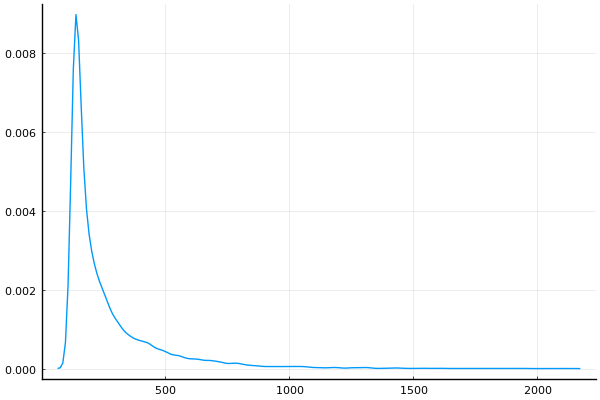

In [13]:
using StatsPlots
density(losses,legend=false) #density plot (kernel density estimation)

We can even make a little movie to try and visualize such a minimum point...

....................................................................................................

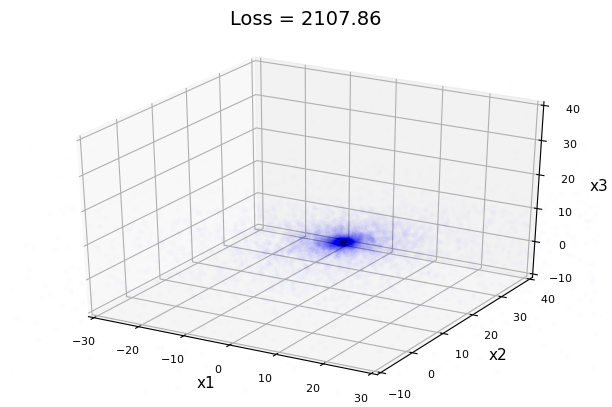

┌ Info: Saved animation to 
│   fn = /Users/wakayama.hideki/Desktop/MATH7502_Mathematics for Data Sci.2/01_lecture/MATH7502-2020-master/DSUC/bestValue.gif
└ @ Plots /Users/wakayama.hideki/.julia/packages/Plots/uCh2y/src/animation.jl:104


Plots.AnimatedGif("/Users/wakayama.hideki/Desktop/MATH7502_Mathematics for Data Sci.2/01_lecture/MATH7502-2020-master/DSUC/bestValue.gif")
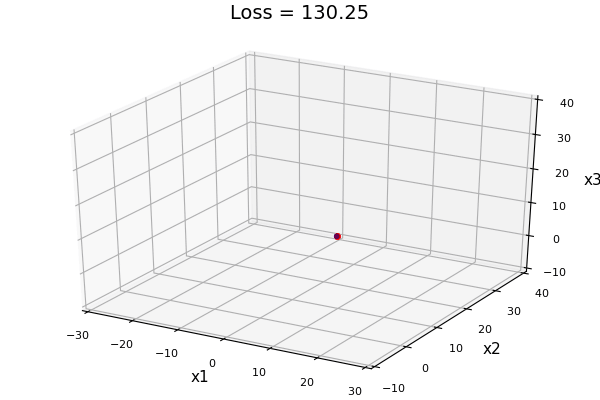

In [14]:
ani = Animation()
for α in 0.01:0.01:1.0
    lossQ = quantile(losses,α)
    pltPnts = filter(x->x[4] < lossQ,pts)
    scatter([xHat[1]],[xHat[2]],[xHat[3]],c=:red,ms=5.0,markerstrokewidth=0)
    scatter!(first.(pltPnts),(x->x[2]).(pltPnts),(x->x[3]).(pltPnts),
        c=:blue,markeralpha=0.01,markerstrokewidth=0,xlabel="x1",ylabel="x2",zlabel="x3",legend=false,
        xlim=(-30,30),ylim=(-10,40),zlim=(-10,40),title="Loss = $(round(lossQ,digits=2))")
    frame(ani)
    print(".")
end
cd(@__DIR__)
gif(ani,"bestValue.gif",fps=10)

## Getting there via gradient descent

$$
L(x) =||Ax-b||^2 = (Ax-b)^T(Ax-b)
$$

$$
\nabla L(x) = 2A^T(Ax-b).
$$

In [15]:
traj = []
x = ones(3) #initial point (arbitraty)
xprev = -x
η = 0.0001 #learning rate
while norm(x-xprev) > 10^-3
    xprev = x
    x = x - η*2A'*(A*x-b) #gradient descent steps.  This is the gradient: 2A'*(A*x-b)
    push!(traj,x)
end

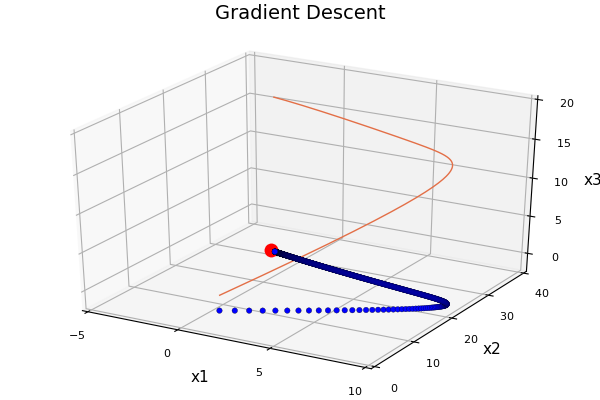

In [16]:
scatter(first.(traj),(x->x[2]).(traj),(x->x[3]).(traj),
        c=:blue,markeralpha=1,markerstrokewidth=0.2,xlabel="x1",ylabel="x2",zlabel="x3",legend=false,
        xlim=(-5,10),ylim=(0,40),zlim=(-2,20),title="Gradient Descent")
plot!(first.(traj),(x->x[2]).(traj),(x->x[3]).(traj))
scatter!([xHat[1]],[xHat[2]],[xHat[3]],c=:red,ms=10.0,markerstrokewidth=0)

## The Normal Equations and $A^\dagger$

$$
\nabla L(x) = 2A^T(Ax-b) = 0
$$

$$
2A^TAx = 2A^Tb
$$

$$
x = (A^TA)^{-1}A^T b = A^\dagger b
$$

In [17]:
xHat

3-element Array{Float64,1}:
 -0.7213250090294512
 25.268046024456932
 20.087714772199572

In [18]:
? pinv

search: pinv print println pointer printstyled pointer_from_objref sprint



```
pinv(M; atol::Real=0, rtol::Real=atol>0 ? 0 : n*ϵ)
pinv(M, rtol::Real) = pinv(M; rtol=rtol) # to be deprecated in Julia 2.0
```

Computes the Moore-Penrose pseudoinverse.

For matrices `M` with floating point elements, it is convenient to compute the pseudoinverse by inverting only singular values greater than `max(atol, rtol*σ₁)` where `σ₁` is the largest singular value of `M`.

The optimal choice of absolute (`atol`) and relative tolerance (`rtol`) varies both with the value of `M` and the intended application of the pseudoinverse. The default relative tolerance is `n*ϵ`, where `n` is the size of the smallest dimension of `M`, and `ϵ` is the [`eps`](@ref) of the element type of `M`.

For inverting dense ill-conditioned matrices in a least-squares sense, `rtol = sqrt(eps(real(float(one(eltype(M))))))` is recommended.

For more information, see [^issue8859], [^B96], [^S84], [^KY88].

# Examples

```jldoctest
julia> M = [1.5 1.3; 1.2 1.9]
2×2 Array{Float64,2}:
 1.5  1.3
 1.2  1.9

julia> N = pinv(M)
2×2 Array{Float64,2}:
  1.47287   -1.00775
 -0.930233   1.16279

julia> M * N
2×2 Array{Float64,2}:
 1.0          -2.22045e-16
 4.44089e-16   1.0
```

[^issue8859]: Issue 8859, "Fix least squares", [https://github.com/JuliaLang/julia/pull/8859](https://github.com/JuliaLang/julia/pull/8859)

[^B96]: Åke Björck, "Numerical Methods for Least Squares Problems",  SIAM Press, Philadelphia, 1996, "Other Titles in Applied Mathematics", Vol. 51. [doi:10.1137/1.9781611971484](http://epubs.siam.org/doi/book/10.1137/1.9781611971484)

[^S84]: G. W. Stewart, "Rank Degeneracy", SIAM Journal on Scientific and Statistical Computing, 5(2), 1984, 403-413. [doi:10.1137/0905030](http://epubs.siam.org/doi/abs/10.1137/0905030)

[^KY88]: Konstantinos Konstantinides and Kung Yao, "Statistical analysis of effective singular values in matrix rank determination", IEEE Transactions on Acoustics, Speech and Signal Processing, 36(5), 1988, 757-763. [doi:10.1109/29.1585](https://doi.org/10.1109/29.1585)


In [19]:
pinv(A) #pseudoinverse (A'A)^{-1}A'

3×10 Array{Float64,2}:
 -0.0590785   0.0235282   0.0419483  …  -0.103555    0.0635674    0.0514937
  0.0171611   0.101986    0.0120943      0.0919148  -0.0121769    0.0433827
  0.0523915  -0.0921315  -0.0274186      0.016026    0.00371498  -0.0437439

In [20]:
inv(A'*A)*A'

3×10 Array{Float64,2}:
 -0.0590785   0.0235282   0.0419483  …  -0.103555    0.0635674    0.0514937
  0.0171611   0.101986    0.0120943      0.0919148  -0.0121769    0.0433827
  0.0523915  -0.0921315  -0.0274186      0.016026    0.00371498  -0.0437439

In [21]:
pinv(A)*b

3-element Array{Float64,1}:
 -0.7213250090294663
 25.26804602445693
 20.087714772199597

In [22]:
xHat

3-element Array{Float64,1}:
 -0.7213250090294512
 25.268046024456932
 20.087714772199572

In [23]:
A'A \ A'b #solve the normal equations 

3-element Array{Float64,1}:
 -0.7213250090294704
 25.26804602445694
 20.087714772199586

## Using Factorizations for $A^\dagger$

### The QR factorization: $A= QR$

$$
A^\dagger = (A^TA)^{-1}A^T = (R^TQ^TQR)^{-1} R^T Q^T = (R^TR)^{-1}R^T Q^T = R^{-1}Q^T
$$

So a least squares approximate solution can be obtained via $\hat{x} = R^{-1}Q^T b$

In [24]:
F = qr(A);
Q, R = F.Q, F.R
R

3×3 Array{Float64,2}:
 -8.60233  -9.41606  -8.83482
  0.0      -6.19176  -3.84557
  0.0       0.0       5.84445

In [25]:
Q'*Q

10×10 Array{Float64,2}:
  1.0           1.38778e-16  -6.93889e-17  …  1.66533e-16   1.11022e-16
  1.38778e-16   1.0          -1.63064e-16     5.89806e-17  -5.55112e-17
 -6.93889e-17  -1.63064e-16   1.0             2.77556e-17   8.32667e-17
  1.12323e-16  -1.95156e-18  -9.84456e-17     3.79471e-17   1.30104e-17
  2.63678e-16   7.80626e-17  -1.249e-16       7.28584e-17   1.38778e-17
  1.50921e-16   9.45424e-17  -2.48933e-16  …  5.20417e-18  -4.51028e-17
  2.35922e-16   2.498e-16     1.11022e-16     2.08167e-17   2.77556e-17
  1.52656e-16  -9.1073e-17   -1.79544e-16     5.55112e-17  -2.42861e-17
  1.66533e-16   5.89806e-17   2.77556e-17     1.0           2.77556e-17
  1.11022e-16  -5.55112e-17   8.32667e-17     2.77556e-17   1.0

In [26]:
inv(R)*Q'*b

3-element Array{Float64,1}:
 -0.7213250090294547
 25.268046024456922
 20.087714772199593

In [27]:
pinv(A)*b

3-element Array{Float64,1}:
 -0.7213250090294663
 25.26804602445693
 20.087714772199597

### The SVD factorization: $A= U \Sigma V^T$

$$
A^\dagger = (A^TA)^{-1}A^T = (V \Sigma U^T U \Sigma V^T)^{-1} V \Sigma U^T = (V \Sigma^2 V^T)^{-1} V \Sigma U^T
=V^{-T} \Sigma^{-2} V^{-1} V \Sigma U^T = V \Sigma^{-1} U^T
$$

So a least squares approximate solution can be obtained via $\hat{x} = V \Sigma^{-1} U^T$

In [28]:
F = svd(A)
U, S, V = F.U , F.S, F.V;
S

3-element Array{Float64,1}:
 17.05423938497788
  4.693241515159658
  3.889267679171903

In [29]:
rank(A)

3

In [30]:
pinv(A)

3×10 Array{Float64,2}:
 -0.0590785   0.0235282   0.0419483  …  -0.103555    0.0635674    0.0514937
  0.0171611   0.101986    0.0120943      0.0919148  -0.0121769    0.0433827
  0.0523915  -0.0921315  -0.0274186      0.016026    0.00371498  -0.0437439

In [31]:
S

3-element Array{Float64,1}:
 17.05423938497788
  4.693241515159658
  3.889267679171903

In [32]:
V*Diagonal(1 ./ S)*U'  #just like pinv(A)

3×10 Array{Float64,2}:
 -0.0590785   0.0235282   0.0419483  …  -0.103555    0.0635674    0.0514937
  0.0171611   0.101986    0.0120943      0.0919148  -0.0121769    0.0433827
  0.0523915  -0.0921315  -0.0274186      0.016026    0.00371498  -0.0437439

## What if $(A^T A)$ is singular? SVD to the rescue...

In [33]:
#search for a bad example...
s = 0
while true
    Random.seed!(s)
    A = rand([1,2],n,m)
    r = rank(A)
    if rank(A) < 3
        println("Found rank $(r) matrix with seed s=$s")
        break
    end
    s += 1 #increase the seed
end

Found rank 2 matrix with seed s=204


In [34]:
Random.seed!(204);
A = rand([1.0,2.0],n,m)

10×3 Array{Float64,2}:
 2.0  1.0  2.0
 1.0  2.0  1.0
 1.0  1.0  1.0
 1.0  2.0  1.0
 1.0  1.0  1.0
 2.0  2.0  2.0
 1.0  1.0  1.0
 1.0  1.0  1.0
 2.0  2.0  2.0
 1.0  2.0  1.0

In [35]:
rank(A)

2

In [36]:
rank(A'*A),det(A'*A)

(2, 0.0)

In [37]:
inv(A'*A)

SingularException: SingularException(3)

In [38]:
b

10-element Array{Int64,1}:
 200
 160
 140
 180
 180
 120
 120
 200
 120
 140

So it appears that finding a least squares approximate solution to $Ax = b$ isn't doable...???

In [39]:
A \ b  #wow this appears to have given us a "least squares solution"

3-element Array{Float64,1}:
 29.333333333333293
 44.266666666666694
 29.333333333333307

In [40]:
aDag = pinv(A)

3×10 Array{Float64,2}:
  0.2   -0.1    0.0333333  -0.1   …   0.0333333   0.0666667  -0.1
 -0.28   0.24  -0.0133333   0.24     -0.0133333  -0.0266667   0.24
  0.2   -0.1    0.0333333  -0.1       0.0333333   0.0666667  -0.1

In [41]:
aDag*A #the pseudo-inverse is a "left inverse"

3×3 Array{Float64,2}:
 0.5          1.11022e-16  0.5
 5.55112e-17  1.0          5.55112e-17
 0.5          4.16334e-16  0.5

In [42]:
aDag*b

3-element Array{Float64,1}:
 29.333333333333346
 44.266666666666644
 29.333333333333343

In [43]:
sqrt.(eigvals(A'A))

3-element Array{Float64,1}:
 6.647911640487457e-8
 1.57431136632405
 7.779559352679489

In [44]:
F = svd(A)
U, S, V = F.U , F.S, F.V;
S #only two singular values....

3-element Array{Float64,1}:
 7.779559352679487
 1.5743113663240509
 4.741575244451873e-16

In [45]:
S = filter(x->x>10^-6,S)  #throw away 0's...

2-element Array{Float64,1}:
 7.779559352679487
 1.5743113663240509

In [46]:
r = length(S)

2

In [47]:
V

3×3 Adjoint{Float64,Array{Float64,2}}:
 -0.553166  -0.440462   0.707107
 -0.622908   0.782295   5.55112e-17
 -0.553166  -0.440462  -0.707107

In [48]:
U

10×3 Array{Float64,2}:
 -0.36449  -0.622211    0.69282
 -0.30235   0.434263    0.23094
 -0.22228  -0.0626493  -0.173205
 -0.30235   0.434263    0.23094
 -0.22228  -0.0626493  -0.173205
 -0.44456  -0.125299   -0.34641
 -0.22228  -0.0626493  -0.173205
 -0.22228  -0.0626493  -0.173205
 -0.44456  -0.125299   -0.34641
 -0.30235   0.434263    0.23094

In [49]:
V[:,1:r]

3×2 Array{Float64,2}:
 -0.553166  -0.440462
 -0.622908   0.782295
 -0.553166  -0.440462

$$
V \Sigma^{-1} U^T
$$

In [50]:
V[:,1:r]*Diagonal(1 ./ S)*U[:,1:r]'   #using the compact SVD for the pseudo-inverse

3×10 Array{Float64,2}:
  0.2   -0.1    0.0333333  -0.1   …   0.0333333   0.0666667  -0.1
 -0.28   0.24  -0.0133333   0.24     -0.0133333  -0.0266667   0.24
  0.2   -0.1    0.0333333  -0.1       0.0333333   0.0666667  -0.1

In [51]:
pinv(A)

3×10 Array{Float64,2}:
  0.2   -0.1    0.0333333  -0.1   …   0.0333333   0.0666667  -0.1
 -0.28   0.24  -0.0133333   0.24     -0.0133333  -0.0266667   0.24
  0.2   -0.1    0.0333333  -0.1       0.0333333   0.0666667  -0.1

## What is going on? Back to the normal equations...

$$
A^T A x = A^T b
$$

And using $A = U \Sigma^{-1} V^T$   (this is the SVD)

In [52]:
A'*A*(pinv(A)*b) - A'*b

3-element Array{Float64,1}:
 0.0
 0.0
 0.0

$$
A^T A x = A^T b
$$

$$
(U \Sigma V^T)^T U \Sigma V^T x = (U \Sigma V^T)^T b
$$

$$
V \Sigma^2 V^T x = V \Sigma U^T b
$$

Now notice that $V \Sigma^{-2} V^T$ is a left inverse of $V \Sigma^2 V^T$. So left multiply by it:

$$
x = V \Sigma^{-2} V^T V \Sigma U^T b 
$$

Hence,

$$
x = V \Sigma^{-1} U^T b
$$

So in summary, we see that using the SVD for the pseudo-inverse yields a robust solution. Note that when $A$ isn't full rank (and thus $A^T A$ is singular), there are many solutions to the normal equations. It can be shown that the one based on the SVD based left-inverse is the minimal solution...

---

The next topic we explore, Tikhonov regularization (ridge regression) is related... Think that we modify $A^TA$ by adding a term:
$$
A^TA + \lambda I
$$
with $\lambda > 0 $

shrinkage estimators (Chapter 14 of VMLS)

In [1]:
rank(AA(0.001))

UndefVarError: UndefVarError: AA not defined

In [54]:
AA(λ) = A'*A + λ*I  #\lambda + [TAB]
inv(AA(0.01))*A'

3×10 Array{Float64,2}:
  0.199296  -0.0995153   0.0332603  …   0.0332603   0.0665206  -0.0995153
 -0.278762   0.239129   -0.0132112     -0.0132112  -0.0264223   0.239129
  0.199296  -0.0995153   0.0332603      0.0332603   0.0665206  -0.0995153

In [55]:
pinv(A)

3×10 Array{Float64,2}:
  0.2   -0.1    0.0333333  -0.1   …   0.0333333   0.0666667  -0.1
 -0.28   0.24  -0.0133333   0.24     -0.0133333  -0.0266667   0.24
  0.2   -0.1    0.0333333  -0.1       0.0333333   0.0666667  -0.1

In [56]:
[norm(pinv(A) - inv(AA(λ))*A') for λ in 0.5:-0.001:0.001]

500-element Array{Float64,1}:
 0.10663734620705814
 0.1064598114844861
 0.10628215748348022
 0.10610438408377042
 0.10592649116492865
 0.10574847860636352
 0.10557034628731969
 0.10539209408688131
 0.10521372188396942
 0.10503522955734089
 0.10485661698558987
 0.10467788404714788
 0.10449903062028054
 ⋮
 0.0030607421523459345
 0.002806807256767531
 0.002552668284534555
 0.0022983249895064286
 0.002043777125163965
 0.0017890244445544544
 0.001534066700416769
 0.0012789036449568556
 0.0010235350300804545
 0.0007679606072593527
 0.0005121801275852495
 0.0002561933417423063

### Regularization

The idea is to to add a weighted term of $||x||^2$. The objective is then:

$$
L_\lambda(x) = ||Ax - b||^2 + \lambda ||x||^2 = 
||
\left[\begin{matrix}
A \\ \sqrt{\lambda} I \end{matrix}\right] x
- 
\left[\begin{matrix}
b \\ 0\end{matrix}\right]
||^2
$$

Here,
$$ 
\tilde{A}  = \left[\begin{matrix}
A \\ \sqrt{\lambda} I \end{matrix}\right]
\qquad
\tilde{b} = \left[\begin{matrix}
b \\ 0\end{matrix}\right]
$$

And hence $\hat{x} = (\tilde{A}^T\tilde{A})^{-1} \tilde{A}^T \tilde{b} = (A^TA +\lambda I)^{-1}A^Tb $ 



$$
|| \tilde{A} x - \tilde{b} ||^2
$$

# Data Fitting

### Some 'reality'...

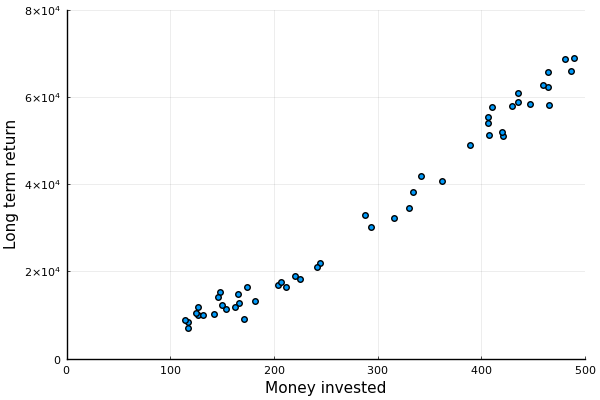

In [155]:
Random.seed!(0)
reality(x) = 250 + 30x + 0.8x^1.8 + 2000randn() #mother 'nature'
n = 50;
xVals = 100 .+ 400rand(n)
yVals = reality.(xVals)
scatter(xVals,yVals,legend=false,
    xlabel="Money invested", ylabel = "Long term return",xlim=(0,500),ylim=(0,0.8*10^5))

In [156]:
#lets fit a straight line
#design matrix
A = [ones(n) xVals]
betaHat = inv(A'A)*A'*yVals  #simple linear regression 

2-element Array{Float64,1}:
 -13367.879009949533
    161.36588153368015

In [157]:
pred(x) = betaHat[1] + betaHat[2]*x

pred (generic function with 1 method)

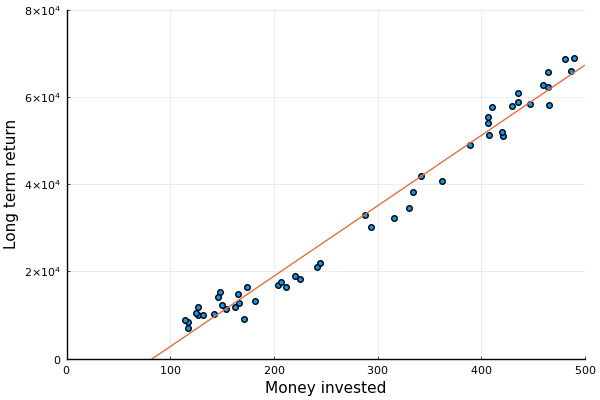

In [158]:
scatter(xVals,yVals,legend=false,
    xlabel="Money invested", ylabel = "Long term return",xlim=(0,500),ylim=(0,0.8*10^5))
plot!([0,500],[pred(0),pred(500)],label="line fit") #only plotted 2 points

$$
\beta_0 + \beta_1 x + \beta_2 x^2
$$


In [159]:
#let's go quadrataic
A = [ones(n) xVals xVals.^2]
newBetaHat = inv(A'A)*A'*yVals  #simple linear regression 

3-element Array{Float64,1}:
 891.225567701518
  41.944864622765174
   0.20140711662387806

In [160]:
newPred(x) = newBetaHat'*[1,x,x^2]

newPred (generic function with 1 method)

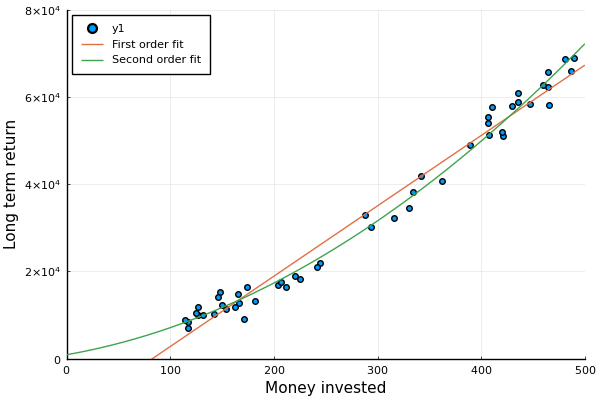

In [161]:
xPltPoints=0:500
scatter(xVals,yVals,legend=true,
    xlabel="Money invested", ylabel = "Long term return",xlim=(0,500),ylim=(0,0.8*10^5))
plot!(xPltPoints,pred.(xPltPoints),label="First order fit") 
plot!(xPltPoints,newPred.(xPltPoints),label="Second order fit") 

### Say we look at this data and decide to fit a curve of the form
$$
y = \beta_0 + \beta_1 x + \beta_2 x^2 =
\left[\begin{matrix}
1 & x & x^2 \end{matrix}\right]
\left[\begin{matrix}
\beta_0 \\ \beta_1 \\ \beta_2 \end{matrix}\right]
$$

We can now set the **design matrix**:

$$
A = 
\left[\begin{matrix}
1 & x_1 & x_1^2 \\
1 & x_2 & x_2^2 \\
1 & x_3 & x_3^2 \\
\vdots & \vdots & \vdots \\
1 & x_n & x_n^2 \\
\end{matrix}\right]
$$

And seek a $\beta$ vector that minimizes $||A \beta - y||$.

### What about a different model...

In [162]:
A

50×3 Array{Float64,2}:
 1.0  429.459  184435.0
 1.0  464.143  215428.0
 1.0  165.826   27498.4
 1.0  170.932   29217.6
 1.0  211.552   44754.3
 1.0  181.391   32902.6
 1.0  116.921   13670.4
 1.0  127.308   16207.3
 1.0  244.731   59893.4
 1.0  489.287  239401.0
 1.0  334.325  111773.0
 1.0  315.716   99676.4
 1.0  204.014   41621.9
 ⋮             
 1.0  293.864   86356.2
 1.0  459.68   211305.0
 1.0  480.676  231050.0
 1.0  420.447  176776.0
 1.0  149.729   22418.8
 1.0  145.708   21230.7
 1.0  131.822   17377.0
 1.0  410.67   168650.0
 1.0  141.929   20143.9
 1.0  435.23   189425.0
 1.0  173.646   30152.9
 1.0  224.858   50561.1

In [163]:
A =[xVals[i]^j for i in 1:n, j in 0:4]; #A has more powers
betaHat = pinv(A)*yVals

5-element Array{Float64,1}:
 569.9674662378493
 107.79862919485993
  -0.5453038951306075
   0.002571194871979982
  -2.732196407643429e-6

In [164]:
yHat(x) = betaHat'*[1,x,x^2,x^3,x^4]

yHat (generic function with 1 method)

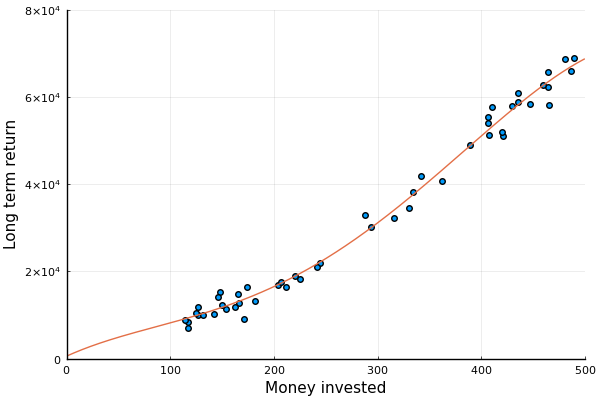

In [165]:
xGrid = 0:500
yEst = yHat.(xGrid);
scatter(xVals,yVals,legend=false,
    xlabel="Money invested", ylabel = "Long term return",xlim=(0,500),ylim=(0,0.8*10^5))
plot!(xGrid,yEst)

### Getting a complex model...

In [166]:
length(powers)

31

In [167]:
powers = 0:0.1:3
A =[xVals[i]^p for i in 1:n, p in powers];
betaHat = pinv(A)*yVals

31-element Array{Float64,1}:
       1.4794231724950373e7
       1.5035114691341102e7
       1.4631077774346262e7
       1.3287968815747976e7
       1.0960290111683741e7
       7.672479822751664e6
       3.610910037060839e6
 -841992.2900344953
      -5.106099906086788e6
      -8.455684959282205e6
      -1.014312818228975e7
      -9.597524065667778e6
      -6.672393640597768e6
       ⋮
      -6.006055603000715e6
      -8.379400639894038e6
      -4.486097589328948e6
       3.4657726184003353e6
       8.176590542220831e6
       3.1362095092576863e6
      -6.869136597689778e6
      -5.029653917860217e6
       9.071270217161536e6
      -4.440200719956398e6
  943134.7390007526
  -74512.00425352901

In [168]:
yHat(x) = betaHat'*[x^p for p in powers]

yHat (generic function with 1 method)

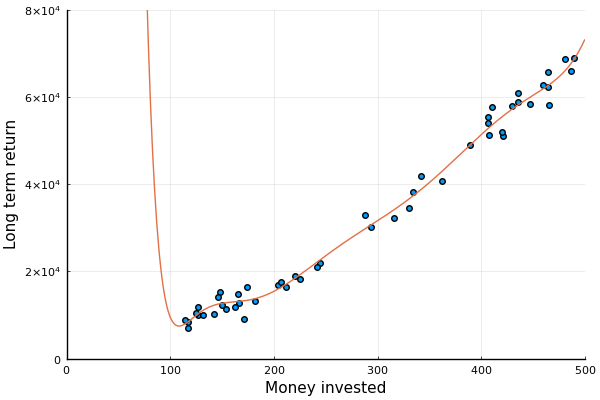

In [169]:
xGrid = 0:500
yEst = yHat.(xGrid);
scatter(xVals,yVals,legend=false,
    xlabel="Money invested", ylabel = "Long term return",xlim=(0,500),ylim=(0,0.8*10^5))
plot!(xGrid,yEst)

### Staying with the complex model, but regularizing

In [170]:
ridgeBeta(λ) = inv(A'*A + λ*I)*A'*yVals
λGrid = 0:20:2000
betaEsts = ridgeBeta.(λGrid); #doing many fits, one for each \lambda
norm.(betaEsts)

101-element Array{Float64,1}:
   4.259397544040655e10
 251.55186034803359
 169.00394606360106
 127.99518814287431
 101.2304305205067
  85.33876828856809
  74.09663838846248
  65.04431766478672
  57.70073380314885
  52.41169362688005
  47.79968764577003
  44.14418478024229
  40.87697187788756
   ⋮
  11.4040709445341
  11.365581150139159
  11.326504795164455
  11.28682161200504
  11.249948905128315
  11.216751462220627
  11.184164029182696
  11.15410046364259
  11.114505245809633
  11.085877525505051
  11.052403067692914
  11.022911534274668

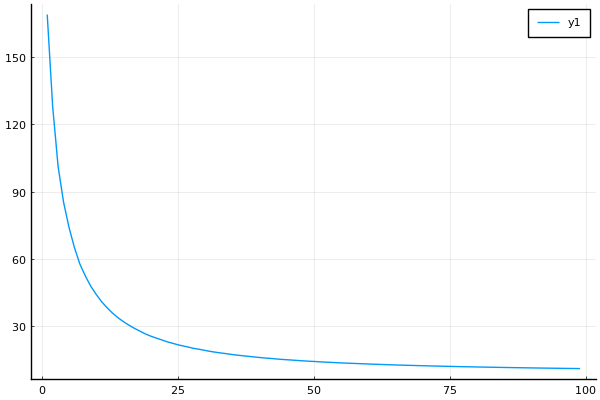

In [171]:
plot(norm.(betaEsts[3:end]))

In [172]:
betaHat = ridgeBeta(100000.0) #with lambda = 2000

31-element Array{Float64,1}:
  0.002896219117997142
  0.00440774193494037
  0.006668034745783796
  0.010022401924674587
  0.014959338122875296
  0.022159369999332656
  0.0325540523041013
  0.04739206764103096
  0.06830472553912142
  0.09735535733118433
  0.1370448255749126
  0.1902282800344195
  0.25987635705425327
  ⋮
  1.0757255258627672
  1.0653211180476658
  0.928644085643421
  0.641727813547457
  0.22119413981117075
 -0.245573913929793
 -0.585431672225996
 -0.5838670635227475
 -0.15238947592518892
  0.37371386239438054
  0.17423548881938333
 -0.11166929724821452

In [173]:
yHat(x) = betaHat'*[x^p for p in powers]

yHat (generic function with 1 method)

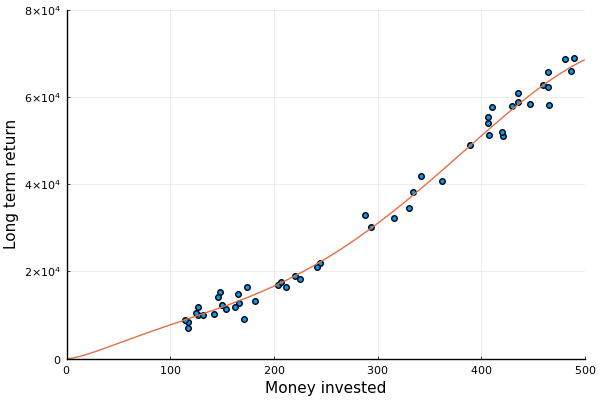

In [174]:
xGrid = 0:500
yEst = yHat.(xGrid);
scatter(xVals,yVals,legend=false,
    xlabel="Money invested", ylabel = "Long term return",xlim=(0,500),ylim=(0,0.8*10^5))
plot!(xGrid,yEst)

#### In practice you may choose the "best" $\lambda$ using cross-validation. 

#### A more advanced method is LASSO or Elastic Nets, where some variables are "knocked off" fully. 

Listing 9.10 in [SWJ]
https://raw.githubusercontent.com/h-Klok/StatsWithJuliaBook/master/9_chapter/ridgeRegressionCross.jl


Loosing 9 observations.
Found best lambda for regularization: 7600
Beta estimate: [2.207, 3.754, 32.339]


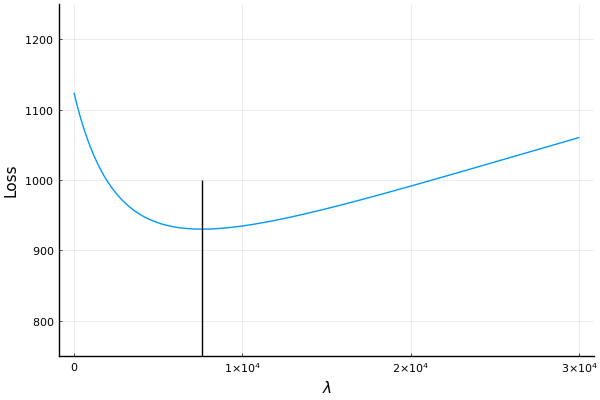

In [175]:
using RDatasets, DataFrames, Random, Statistics, LinearAlgebra
using MultivariateStats, LaTeXStrings, Plots; pyplot()
Random.seed!(0)

df = dataset("MASS", "cpus")
n = size(df)[1]
df = df[shuffle(1:n),:]

K = 10
nG = Int(floor(n/K))
n = K*nG
println("Loosing $(size(df)[1] - n) observations.")

lamGrid = 0:100:30000

devSet(k) = collect(1+nG*(k-1):nG*k)
trainSet(k) = setdiff(1:n,devSet(k))

xTrain(k) = convert(Array{Float64,2},df[trainSet(k),[:Cach, :ChMin]])
xDev(k) = convert(Array{Float64,2},df[devSet(k),[ :Cach, :ChMin]])

yTrain(k) = convert(Array{Float64,1},df[trainSet(k),:Perf])
yDev(k) = convert(Array{Float64,1},df[devSet(k),:Perf])

errVals = zeros(length(lamGrid))
for (i,lam) in enumerate(lamGrid)
    errSamples = zeros(K)
    for k in 1:K
        beta = ridge(xTrain(k),yTrain(k),lam)
        errSamples[k] = norm([ones(nG) xDev(k)]*beta - yDev(k) )^2
    end
    errVals[i] = sqrt(mean(errSamples))
end

i = argmin(errVals)
bestLambda = lamGrid[i]

betaFinal = ridge(convert(Array{Float64,2},df[:,[:Cach, :ChMin]]),
                  convert(Array{Float64,1},df[:,:Perf]),bestLambda)

macro RR(x) return:(round.($x,digits = 3)) end
println("Found best lambda for regularization: ", bestLambda)
println("Beta estimate: ", @RR betaFinal)

plot(lamGrid, errVals,legend = false,
     xlabel = L"\lambda", ylabel = "Loss")
plot!([bestLambda,bestLambda],[0,10^3], c = :black, ylim = (750, 1250))

Listing 8.17 in [SWJ], LASSO
https://raw.githubusercontent.com/h-Klok/StatsWithJuliaBook/master/8_chapter/lassoSelection.jl

$$
\min _{\beta \in \mathbb{R}^{p+1}}\|A \beta-y\|_{2}^{2}+\lambda\|\beta\|_{1}
$$

LassoPath (2) solutions for 7 predictors in 73 iterations):
───────────────────────────
        λ   pct_dev  ncoefs
───────────────────────────
[1]  54.0  0.673401       4
[2]  54.2  0.672031       3
───────────────────────────
Coefficients: [0.0, 0.005294166576752644, 0.0056046537521293365, 0.14520251523746927, 0.0, 0.0]


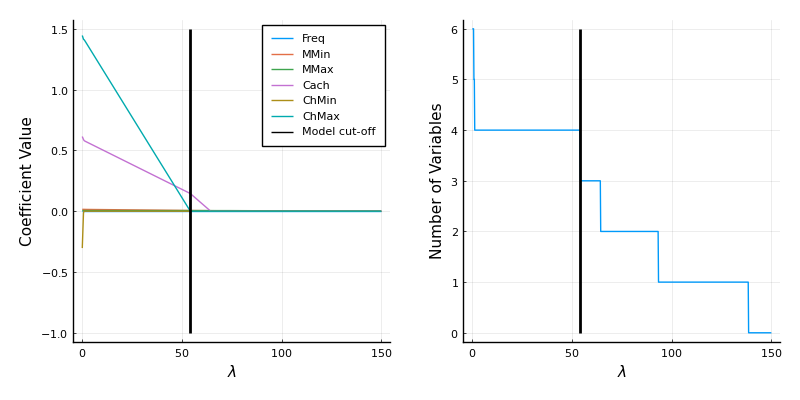

In [78]:
using RDatasets, DataFrames, Lasso, LaTeXStrings, Plots, Measures; pyplot()

df = dataset("MASS", "cpus")
df.Freq = map( x->10^9/x , df.CycT)
df = df[:, [:Perf, :Freq, :MMin, :MMax, :Cach, :ChMin, :ChMax]]
X = [df.Freq df.MMin df.MMax df.Cach df.ChMin df.ChMax]
Y = df.Perf

targetNumVars = 3

lambdaStep = 0.2
lamGrid = collect(0:lambdaStep:150)
lassoFit = fit(LassoPath,X, Y, λ = lamGrid);
dd = Array(lassoFit.coefs)'
nV = sum(dd .!= 0.0 ,dims=2)

goodLambda = lamGrid[findfirst((n)->n==targetNumVars,nV)]
newFit = fit(LassoPath,X, Y, λ = [goodLambda - lambdaStep, goodLambda])
println(newFit)
println("Coefficients: ", Array(newFit.coefs)'[2,:])

p1 = plot(lassoFit.λ, dd, label = ["Freq" "MMin" "MMax" "Cach" "ChMin" "ChMax"],
    ylabel = "Coefficient Value")
plot!([goodLambda,goodLambda],[-1,1.5],c=:black, lw=2, label = "Model cut-off")

p2 = plot(lassoFit.λ,nV, ylabel = "Number of Variables",legend = false)
plot!([goodLambda,goodLambda],[0,6],c=:black, lw=2, label = "Model cut-off")

plot(p1,p2,xlabel= L"\lambda", margin = 5mm, size = (800,400))

# Classification

In [79]:
length(images)

UndefVarError: UndefVarError: images not defined

In [80]:
typeof(images[24])

UndefVarError: UndefVarError: images not defined

In [81]:
labels[445]

UndefVarError: UndefVarError: labels not defined

In [82]:
28*28

784

In [83]:
images[445]

UndefVarError: UndefVarError: images not defined

In [84]:
labels .== 3

UndefVarError: UndefVarError: labels not defined

In [85]:
using Flux.Data.MNIST

images = MNIST.images(:train)
labels = MNIST.labels(:train)

train3 = images[labels .== 3]
train8 = images[labels .== 8]

length(train3),length(train8)

(6131, 5851)

In [86]:
train3[2]

In [87]:
train8[98]

### Also keep the test images

In [88]:
images = MNIST.images(:test)
labels = MNIST.labels(:test)

test3 = images[labels .== 3]
test8 = images[labels .== 8]

length(test3),length(test8)

(1010, 974)

In [89]:
length(train3),length(train8)

(6131, 5851)

In [90]:
yVals = [fill(-1,length(train3)) ; fill(+1,length(train8))] #-1 for "3" and +1 for "8"

11982-element Array{Int64,1}:
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
 -1
  ⋮
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1
  1

In [91]:
n = length(train3) + length(train8)

11982

In [92]:
#The "design matrix"
A = vcat(
    vcat([hcat(float.(t3)...) for t3 in train3]...),
    vcat([hcat(float.(t8)...) for t8 in train8]...)  )
A = [ones(n) A]

11982×785 Array{Float64,2}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  

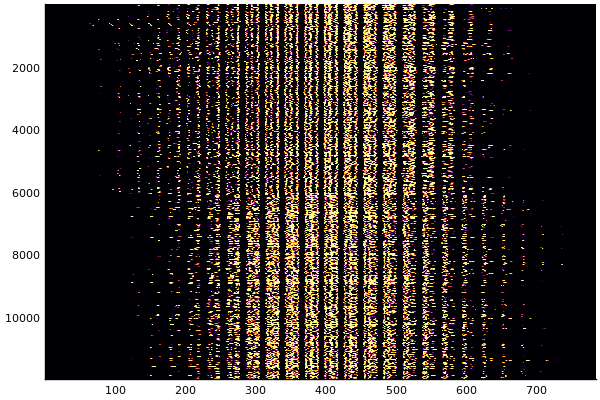

In [93]:
heatmap(A,yflip = true, legend = false)

In [94]:
@time begin
    betaHat = A \ yVals #simply least squares fit to A beta \approx yVals
end

  0.816284 seconds (5.00 k allocations: 79.291 MiB, 4.76% gc time)


785-element Array{Float64,1}:
 -0.2987432828523996
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  ⋮
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0

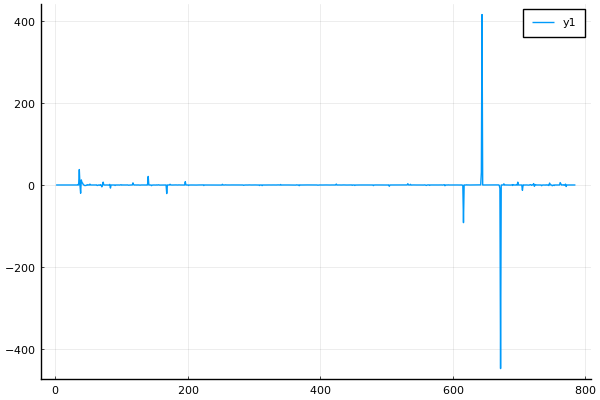

In [95]:
plot(betaHat)

In [96]:
sort(betaHat)

785-element Array{Float64,1}:
 -447.77470256684074
  -91.83906252131739
  -20.93420668900601
  -20.12281731295039
  -12.97009621980062
   -8.58574505159537
   -7.571868295567047
   -4.522049842472696
   -3.7097037552105694
   -3.1826594598424447
   -3.1660984241690184
   -1.8570910582374553
   -1.8022722589018403
    ⋮
    4.658930086917833
    5.163094821836353
    5.853308051783186
    6.170218028440773
    6.922854776188572
    6.956089738575784
    8.05406010572433
   12.399200038103492
   20.872658410985935
   30.89350436759438
   37.6830037701021
  415.661115818606

In [97]:
decide(img) = betaHat'*[1 ; vcat(float.(img)...)] > 0 ? 8 : 3  #if positive then "8" otherwise "3"

decide (generic function with 1 method)

In [98]:
test8[24]

In [99]:
decide(test3[662])

3

### Let's try it out...

In [100]:
test3[1]

In [101]:
decide(test8[1]), 
decide(test3[1]), #makes a mistake...
decide(test3[2])

(8, 8, 3)

In [102]:
truePositive8 = sum(decide.(test8) .== 8)
truePositive3 = sum(decide.(test3) .== 3)

falsePositive3 = sum(decide.(test8) .== 3)
falsePositive8 = sum(decide.(test3) .== 8);

In [103]:
decisionMat = [truePositive3  falsePositive8; falsePositive3 truePositive8 ]

2×2 Array{Int64,2}:
 968   42
  40  934

From [SWJ] Listing 9.5
https://github.com/h-Klok/StatsWithJuliaBook/blob/master/9_chapter/simpleLinearClassifier.jl

In [104]:
rank(A)

613

In [105]:
size(A)

(11982, 785)

In [106]:
onehotbatch([9],0:9)

UndefVarError: UndefVarError: onehotbatch not defined

In [107]:
bets[3]

UndefVarError: UndefVarError: bets not defined

In [108]:
bets

UndefVarError: UndefVarError: bets not defined

In [109]:
testData

UndefVarError: UndefVarError: testData not defined

In [110]:
predictions

UndefVarError: UndefVarError: predictions not defined

In [111]:
using Flux, Flux.Data.MNIST, LinearAlgebra
using Flux: onehotbatch

imgs   = Flux.Data.MNIST.images()
labels = Flux.Data.MNIST.labels()
nTrain = length(imgs)
trainData = vcat([hcat(float.(imgs[i])...) for i in 1:nTrain]...)
trainLabels = labels[1:nTrain]
testImgs = Flux.Data.MNIST.images(:test)
testLabels = Flux.Data.MNIST.labels(:test)
nTest = length(testImgs)
testData = vcat([hcat(float.(testImgs[i])...) for i in 1:nTest]...)

A = [ones(nTrain) trainData]
Adag = pinv(A)
tfPM(x) = x ? +1 : -1  #2x-1
yDat(k) = tfPM.(onehotbatch(trainLabels,0:9)'[:,k+1])
bets = [Adag*yDat(k) for k in 0:9]

classify(input) = findmax([([1 ; input])'*bets[k] for k in 1:10])[2]-1

predictions = [classify(testData[k,:]) for k in 1:nTest]
confusionMatrix = [sum((predictions .== i) .& (testLabels .== j))
				for i in 0:9, j in 0:9]
accuracy = sum(diag(confusionMatrix))/nTest

println("Accuracy: ", accuracy, "\nConfusion Matrix:")
show(stdout, "text/plain", confusionMatrix)

Accuracy: 0.8603
Confusion Matrix:
10×10 Array{Int64,2}:
 944     0   18    4    0   23   18    5   14   15
   0  1107   54   17   22   18   10   40   46   11
   1     2  813   23    6    3    9   16   11    2
   2     2   26  880    1   72    0    6   30   17
   2     3   15    5  881   24   22   26   27   80
   7     1    0   17    5  659   17    0   40    1
  14     5   42    9   10   23  875    1   15    1
   2     1   22   21    2   14    0  884   12   77
   7    14   37   22   11   39    7    0  759    4
   1     0    5   12   44   17    0   50   20  801